# Homework 3 & 4

Yingfeng Lou

1. Time Series Classification  
An interesting task in machine learning is classiﬁcation of time series. In this problem, we will classify the activities of humans based on time series obtained by a Wireless Sensor Network.


(a) Download the Vertebral Column Data Set and load data

In [1]:
import os
import pandas as pd
import numpy as np
import collections
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest

In [2]:
import os
import pandas as pd

folders=os.listdir("C:/Users/hp/Desktop/EE559/HW/Homework 3,4 Data/AReM/")
print(folders)
folders.sort()
load_all_data=dict()
for f in folders:
        dataset=list()
        files=sorted(os.listdir("C:/Users/hp/Desktop/EE559/HW/Homework 3,4 Data/AReM/"+f+"/"),key= lambda x: int(x[7:-4]))
        for file in files:
            c=["time","avg__rss12", "var_rss12", "avg_rss13", "var_rss13","vg_rss23", "ar_rss23"]
            data = pd.read_csv("C:/Users/hp/Desktop/EE559/HW/Homework 3,4 Data/AReM/" + f + "/" + file, skiprows = 5, names = c,index_col = False)
            dataset.append(data)
        load_all_data[f] = dataset
print(load_all_data)

['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking']
{'bending1': [       time  avg__rss12  var_rss12  avg_rss13  var_rss13  vg_rss23  ar_rss23
0         0       39.25       0.43      22.75       0.43     33.75       1.3
1       250       39.25       0.43      23.00       0.00     33.00       0.0
2       500       39.25       0.43      23.25       0.43     33.00       0.0
3       750       39.50       0.50      23.00       0.71     33.00       0.0
4      1000       39.50       0.50      24.00       0.00     33.00       0.0
..      ...         ...        ...        ...        ...       ...       ...
475  118750       43.33       0.47      25.00       0.00     30.00       0.0
476  119000       43.50       0.50      25.50       0.50     30.00       0.0
477  119250       43.50       0.50      24.75       0.43     30.00       0.0
478  119500       43.50       0.50      24.33       0.47     30.00       0.0
479  119750       43.50       0.50      24.25       0.43    

In [3]:
import sys
import warnings
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
if not sys.warnoptions:
    warnings.simplefilter("ignore")

(b) Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data. 

In [4]:
train_set = dict()
test_set = dict()

for i, f in enumerate(load_all_data.keys()):
    if f.startswith("bending"): 
        test_file = 2
    else: 
        test_file = 3
    dataset=load_all_data[f]
    test_data=dataset[:test_file]
    train_data=dataset[test_file:]
    test_set[f] = test_data
    train_set[f] = train_data
print(test_set)
value_list=list(test_set.values())


{'bending1': [       time  avg__rss12  var_rss12  avg_rss13  var_rss13  vg_rss23  ar_rss23
0         0       39.25       0.43      22.75       0.43     33.75       1.3
1       250       39.25       0.43      23.00       0.00     33.00       0.0
2       500       39.25       0.43      23.25       0.43     33.00       0.0
3       750       39.50       0.50      23.00       0.71     33.00       0.0
4      1000       39.50       0.50      24.00       0.00     33.00       0.0
..      ...         ...        ...        ...        ...       ...       ...
475  118750       43.33       0.47      25.00       0.00     30.00       0.0
476  119000       43.50       0.50      25.50       0.50     30.00       0.0
477  119250       43.50       0.50      24.75       0.43     30.00       0.0
478  119500       43.50       0.50      24.33       0.47     30.00       0.0
479  119750       43.50       0.50      24.25       0.43     30.00       0.0

[480 rows x 7 columns],        time  avg__rss12  var_rss12  a

In [5]:
print(train_set)

{'bending1': [       time  avg__rss12  var_rss12  avg_rss13  var_rss13  vg_rss23  ar_rss23
0         0       42.00       0.71      21.25       0.43     30.00      0.00
1       250       41.50       0.50      20.25       1.48     31.25      1.09
2       500       41.50       0.50      14.25       1.92     33.00      0.00
3       750       40.75       0.83      15.75       0.43     33.00      0.00
4      1000       40.00       0.71      20.00       2.74     32.75      0.43
..      ...         ...        ...        ...        ...       ...       ...
475  118750       42.50       0.50      20.00       0.82     36.00      0.00
476  119000       42.67       0.47      21.00       0.00     36.33      0.47
477  119250       44.33       0.94      21.00       0.00     36.33      0.47
478  119500       45.25       0.43      26.75       1.79     36.00      0.00
479  119750       47.25       0.83      29.75       0.43     35.25      1.30

[480 rows x 7 columns],        time  avg__rss12  var_rss12  a

<font color=black size=4>
(c) Feature Extraction  
    
Classification of time series usually needs extracting features from them. In this problem, we focus on time-domain features. 


<font color=black size=3>
i. Research what types of time-domain features are usually used in time series classiﬁcation and list them (examples are minimum, maximum, mean, etc). 

  My answer:  
  Time-domain features are usually used in time series classification:   
  minimum,maximum,mean,standard deviations,first quartile, third quartile, skewness, kurtosis

<font color=black size=3>
ii. Extract the time-domain features minimum, maximum, mean, median, standard deviation, ﬁrst quartile, and third quartile for all of the 6 time series in each instance

In [6]:
import collections
values=480
feature=1
futures=collections.defaultdict(dict)
for fold in load_all_data.keys():
    for i in range(len(load_all_data[fold])):
        time=1
        start=0
        for column in range(1,7):
                    cal=load_all_data[fold][i].iloc[start:,column].describe()
                    futures[feature]["min"+str(time)]=cal["min"]
                    futures[feature]["max"+str(time)]=cal["max"]
                    futures[feature]["mean"+str(time)]=cal["mean"]
                    futures[feature]["median"+str(time)]=cal["50%"]
                    futures[feature]["std"+str(time)]=cal["std"]
                    futures[feature]["1st quart"+str(time)]=cal["25%"]
                    futures[feature]["3rd quart"+str(time)]=cal["75%"]
                    time+=1
        start = start+values
        futures[feature]["activity"]=0
        feature+=1
time_domain_features=pd.DataFrame(futures).T.iloc[:,:-1]
pd.set_option('display.width', 90)
print(time_domain_features)

     min1   max1      mean1  median1      std1  1st quart1  3rd quart1  min2   max2  \
1   37.25  45.00  40.624792    40.50  1.476967       39.25     42.0000   0.0   1.30   
2   38.00  45.67  42.812812    42.50  1.435550       42.00     43.6700   0.0   1.22   
3   35.00  47.40  43.954500    44.33  1.558835       43.00     45.0000   0.0   1.70   
4   33.00  47.75  42.179813    43.50  3.670666       39.15     45.0000   0.0   3.00   
5   33.00  45.75  41.678063    41.75  2.243490       41.33     42.7500   0.0   2.83   
..    ...    ...        ...      ...       ...         ...         ...   ...    ...   
84  19.50  45.33  33.586875    34.25  4.650935       30.25     37.0000   0.0  14.67   
85  19.75  45.50  34.322750    35.25  4.752477       31.00     38.0000   0.0  13.47   
86  19.50  46.00  34.546229    35.25  4.842294       31.25     37.8125   0.0  12.47   
87  23.50  46.25  34.873229    35.25  4.531720       31.75     38.2500   0.0  14.82   
88  19.25  44.00  34.473188    35.00  4.796

iii. Use your judgement to select the three most important time-domain features (one option may be min, mean, and max). 

`From my judgement, the values of min are unstable, so I select std,mean and max as the 3 most important time-domain

(d) Binary Classiﬁcation Using Logistic Regression  
i. Assume that you want to use the training set to classify bending from other activities, i.e. you have a binary classiﬁcation problem. Depict scatter plots of the features you speciﬁed in 1(c)iii extracted from time series 1, 2, and 6 of each instance, and use color to distinguish bending vs. other activities. 

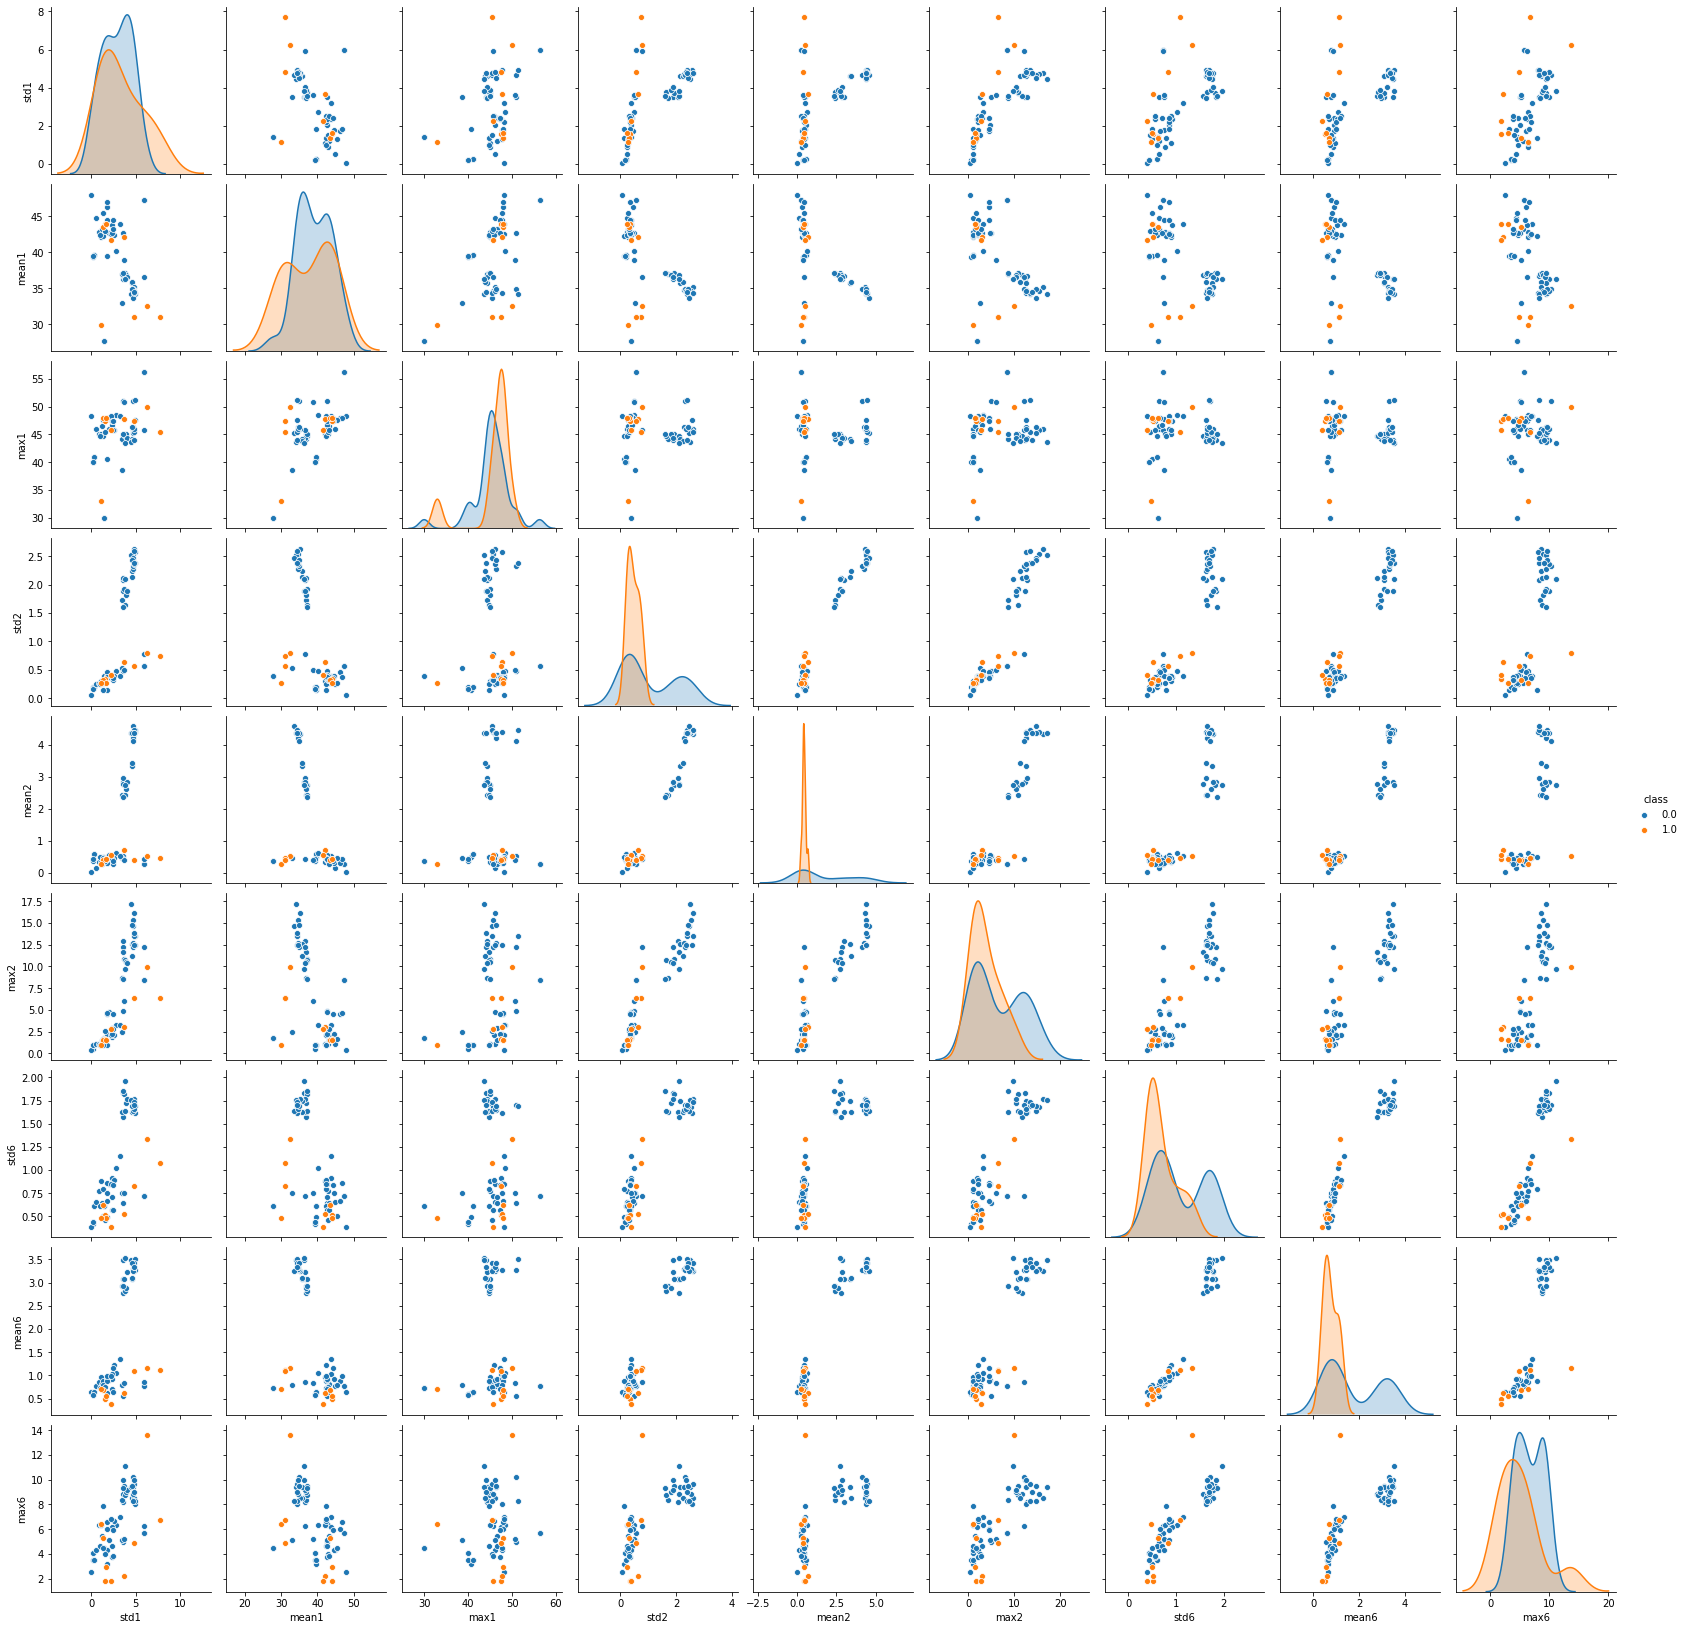

In [7]:
import collections
values=480
feature=1
futures=collections.defaultdict(dict)
for fold in load_all_data.keys():
    for i in range(len(train_set[fold])):
        time=1
        start=0
        for column in range(1,7):
                    cal=train_set[fold][i].iloc[start:,column].describe()
                    futures[feature]["min"+str(time)]=cal["min"]
                    futures[feature]["max"+str(time)]=cal["max"]
                    futures[feature]["mean"+str(time)]=cal["mean"]
                    futures[feature]["median"+str(time)]=cal["50%"]
                    futures[feature]["std"+str(time)]=cal["std"]
                    futures[feature]["1st quart"+str(time)]=cal["25%"]
                    futures[feature]["3rd quart"+str(time)]=cal["75%"]
                    if fold=="bending1" or fold=="bending2":
                        futures[feature]["class"]=1
                    else:
                        futures[feature]["class"]=0
                    time+=1
        start = start+values
        feature+=1
train=pd.DataFrame(futures).T.iloc[:,:-1]
#pd.set_option('display.width', 90)
#print(train)
train_sets=train[['std1','mean1','max1', 'std2', 'mean2', 'max2', 'std6', 'mean6','max6', 'class']]
#train_sets
sns.pairplot(train_sets, hue="class")
plt.show()

ii. Break each time series in your training set into two (approximately) equal length time series. Now instead of 6 time series for each of the training instances, you have 12 time series for each training instance. Repeat the experiment in 1(d)i, i.e depict scatter plots of the features extracted from both parts of the time series 1,2, and 12. Do you see any considerable diﬀerence in the results with those of 1(d)i? 

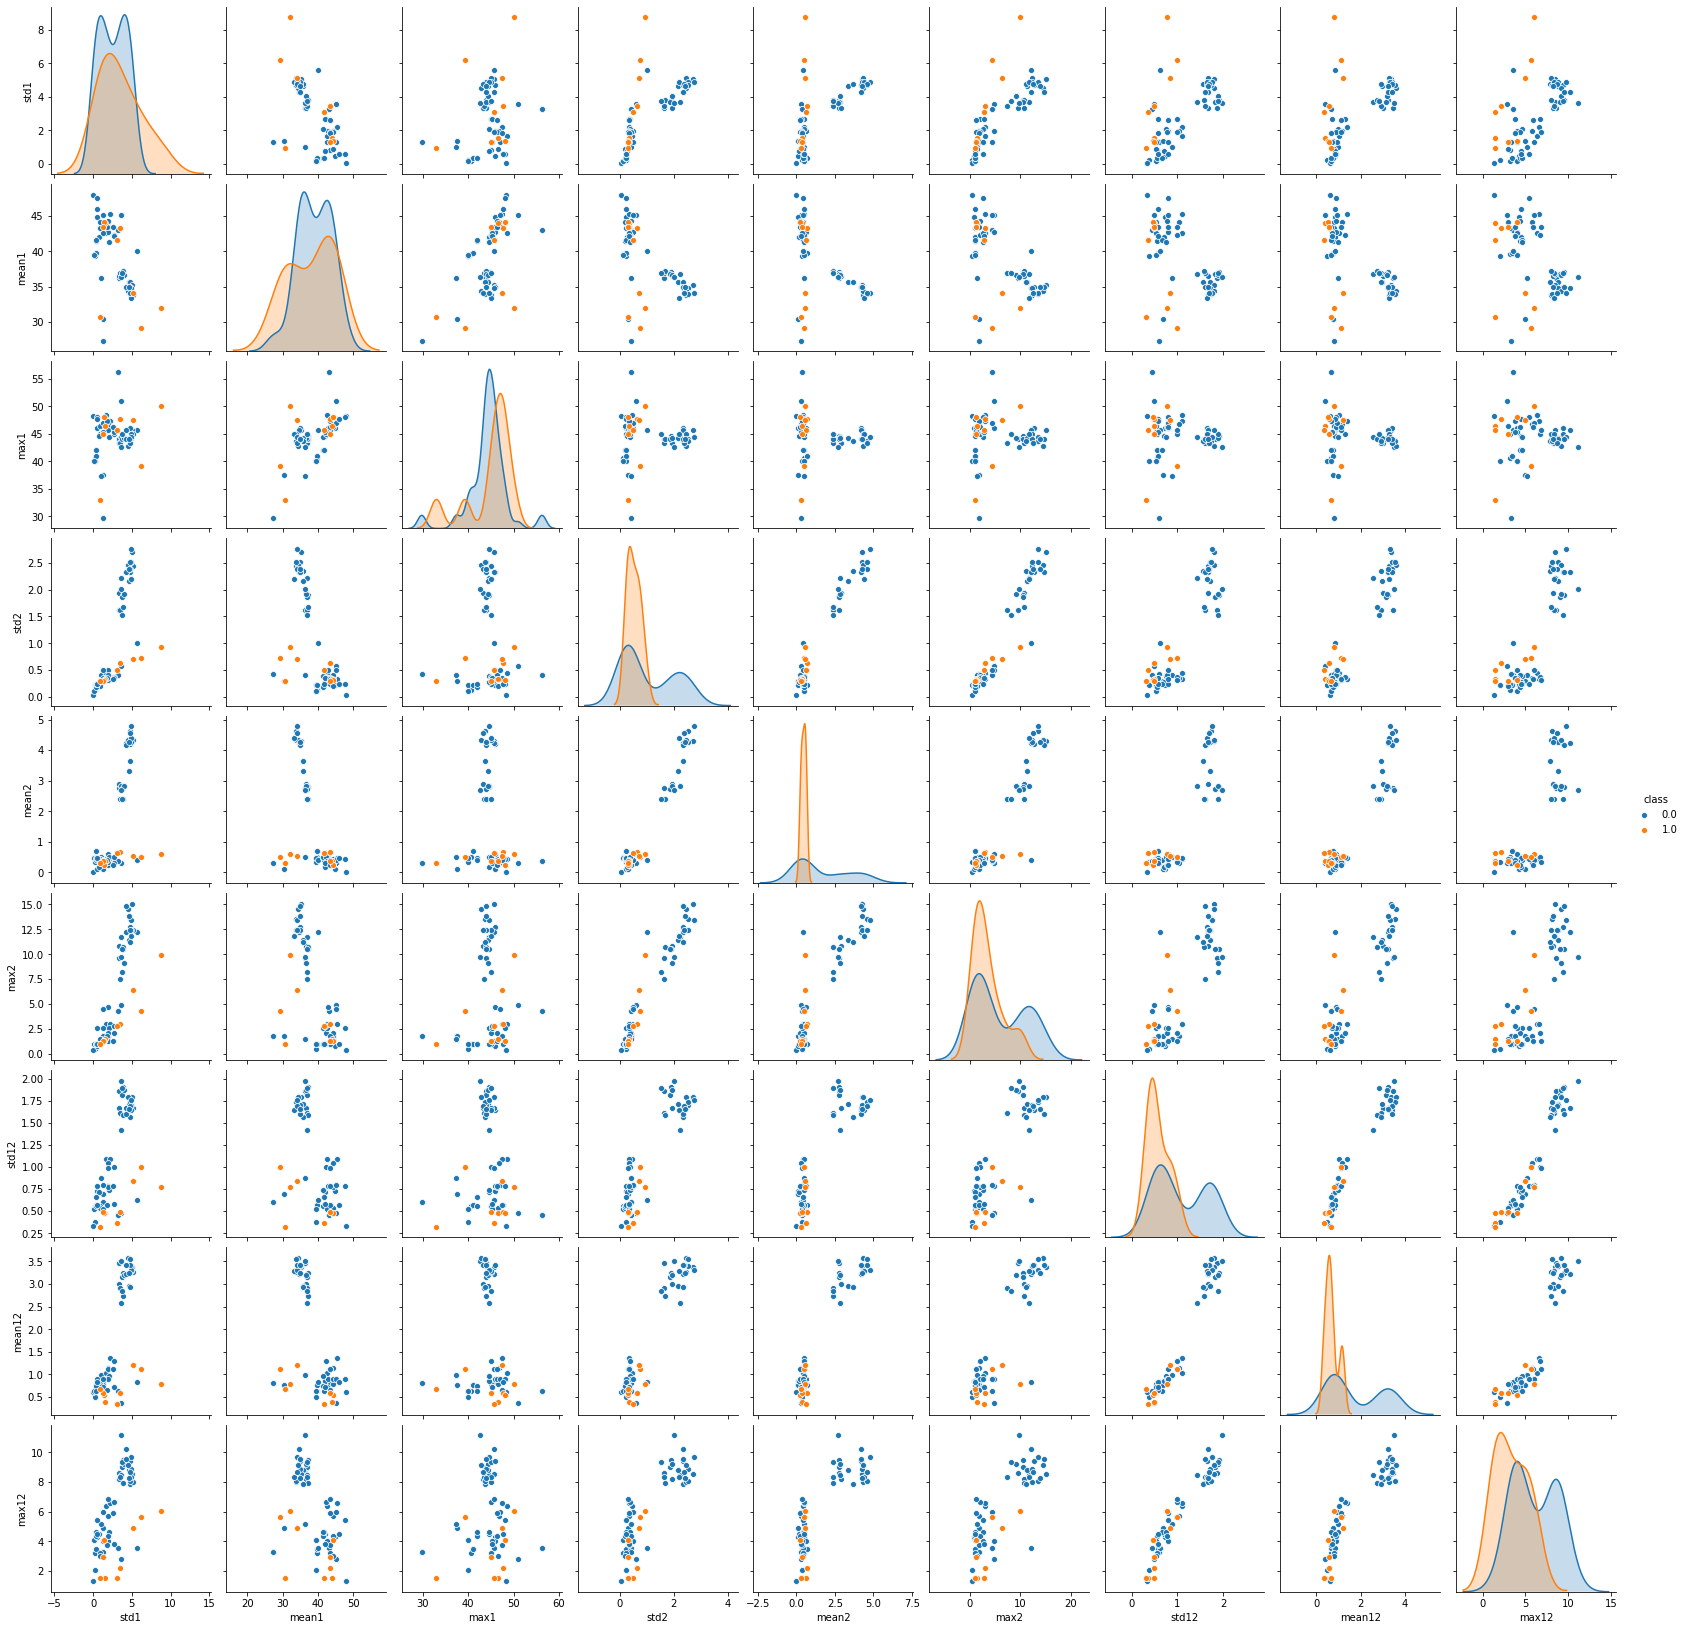

In [8]:
import collections
values=240
feature=1
features=collections.defaultdict(dict)
for fold in load_all_data.keys():
        for i in range(len(train_set[fold])):
            time=1
            start=0
            for j in range(2):
                for column in range(1,7):
                    if j!=1:
                        cal=train_set[fold][i].iloc[start:start+values,column].describe()
                    else:
                        cal=train_set[fold][i].iloc[start:,column].describe()
                    features[feature]["min"+str(time)]=cal["min"]
                    features[feature]["max"+str(time)]=cal["max"]
                    features[feature]["mean"+str(time)]=cal["mean"]
                    features[feature]["std"+str(time)]=cal["std"]
                    features[feature]["first quartile"+str(time)]=cal["25%"]
                    features[feature]["median"+str(time)]=cal["50%"]
                    features[feature]["third quartile"+str(time)]=cal["75%"]
                    time+=1
                start = start+values
            if fold=="bending1" or fold=="bending2":
                features[feature]["class"]=1
            else:
                features[feature]["class"]=0
            feature+=1
train_set_1=pd.DataFrame(features).T
train_set_1=train_set_1[['std1','mean1','max1', 'std2', 'mean2', 'max2', 'std12', 'mean12','max12', 'class']]
#train_set_1
sns.pairplot(train_set_1, hue="class")
plt.show()

 <font color=black size=3>
 there are no considerable difference in the results with those of 1(d)i.

 <font color=black size=5>
(iii)Break each time series in your training set into l ∈{1,2,...,20} time series of approximately equal length and use logistic regression5 to solve the binary classiﬁcation problem, using time-domain features. 

In [9]:
import math
def TrainSet(data_set,l):
    values=math.ceil(480/l)
    feature=1
    features=collections.defaultdict(dict)
    for fold in load_all_data.keys():
        for i in range(len(data_set[fold])):
            time=1
            start=0
            for j in range(l):
                for column in range(1,7):
                    if j!=l-1:
                        cal=data_set[fold][i].iloc[start:start+values,column].describe()
                    else:
                        cal=data_set[fold][i].iloc[start:,column].describe()
                    features[feature]["min"+str(time)]=cal["min"]
                    features[feature]["max"+str(time)]=cal["max"]
                    features[feature]["mean"+str(time)]=cal["mean"]
                    features[feature]["std"+str(time)]=cal["std"]
                    features[feature]["first quartile"+str(time)]=cal["25%"]
                    features[feature]["median"+str(time)]=cal["50%"]
                    features[feature]["third quartile"+str(time)]=cal["75%"]
                    time+=1
                start = start+values
            if fold=="bending1" or fold=="bending2":
                features[feature]["class"]=1
            else:
                features[feature]["class"]=0
            feature+=1
    return pd.DataFrame(features).T

In [10]:
from sklearn.linear_model import LogisticRegression 
l_list=np.arange(1,21,1)
for l in l_list:
    train_1=TrainSet(train_set,l)
    selected_features=[]
    x_train=train_1.drop(['class'], axis=1)
    y_train=train_1['class']
    
    #logistic regression
    model=LogisticRegression()
    rfe=RFECV(model,step=1,cv=5)
    rfe=rfe.fit(x_train,y_train)
    
    #select features find p
    s=rfe.get_support()
    f=x_train.iloc[:,s]
    #print(f.columns)
    row,p=f.shape
    train_score=rfe.score(x_train,y_train)
    F1_score=f1_score(y_train,rfe.predict(x_train))
    g_score=max(rfe.grid_scores_)
    #max_score=max(max_score,train_score)
    print("l=",l, "  p=",p, "train acc=",train_score,"F1-score=",F1_score,"g score=",g_score)
    

l= 1   p= 11 train acc= 1.0 F1-score= 1.0 g score= 1.0
l= 2   p= 72 train acc= 1.0 F1-score= 1.0 g score= 0.9857142857142858
l= 3   p= 4 train acc= 1.0 F1-score= 1.0 g score= 0.9714285714285715
l= 4   p= 1 train acc= 0.9565217391304348 F1-score= 0.823529411764706 g score= 0.9714285714285715
l= 5   p= 1 train acc= 0.9565217391304348 F1-score= 0.823529411764706 g score= 0.9571428571428573
l= 6   p= 14 train acc= 1.0 F1-score= 1.0 g score= 0.9714285714285715
l= 7   p= 26 train acc= 1.0 F1-score= 1.0 g score= 0.9714285714285715
l= 8   p= 84 train acc= 1.0 F1-score= 1.0 g score= 0.9560439560439562
l= 9   p= 1 train acc= 0.9420289855072463 F1-score= 0.75 g score= 0.9571428571428573
l= 10   p= 146 train acc= 1.0 F1-score= 1.0 g score= 0.9714285714285715
l= 11   p= 2 train acc= 0.9710144927536232 F1-score= 0.8888888888888888 g score= 0.9571428571428573
l= 12   p= 184 train acc= 1.0 F1-score= 1.0 g score= 0.9714285714285715
l= 13   p= 54 train acc= 1.0 F1-score= 1.0 g score= 0.9714285714285715


From f1-score and g score, I choose (l,p)=(1,11)  
The right way is applying cross-validation before selecting featres instead of selecting features before CV.

iv.Report the confusion matrix and show the ROC and AUC for your classiﬁer on train data. Report the parameters of your logistic regression βi’s as well as the p-values associated with them. 

In [11]:
from sklearn.metrics import confusion_matrix
train_2=TrainSet(train_set,1)
selected_features=[]
x_train=train_2.drop(['class'], axis=1)
y_train=train_2['class']
    
    #logistic regression
model=LogisticRegression()
rfe=RFECV(model,step=1,cv=5)
rfe=rfe.fit(x_train,y_train)
    
y_predict = rfe.predict(x_train)
confusion_matrix=confusion_matrix(y_train, y_predict)
print("--------/Confusion matrix/------------")
print(confusion_matrix)
    

--------/Confusion matrix/------------
[[60  0]
 [ 0  9]]


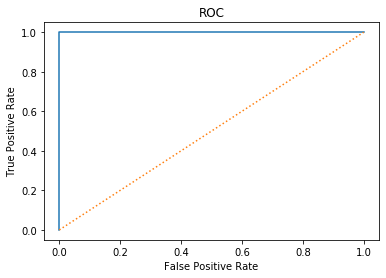

--------AUC Value---------
AUC= 1.0


In [12]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
FPR, TPR, thresholds = roc_curve(y_train, y_predict)
plt.plot(FPR,TPR)
plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
area = auc(FPR, TPR)
print("--------AUC Value---------")
print("AUC=",area)

In [13]:
s=rfe.get_support()
f=x_train.iloc[:,s]
#print(f)
#model_1=sm.Logit(y_train, f).fit_regularized()
model_1=sm.Logit(y_train, f).fit(method="bfgs")
print(model_1.summary())
#print(model_1.params)
#print(model_1.pvalues)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 23
         Function evaluations: 27
         Gradient evaluations: 27
                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                   69
Model:                          Logit   Df Residuals:                       58
Method:                           MLE   Df Model:                           10
Date:                Fri, 03 Jul 2020   Pseudo R-squ.:                   1.000
Time:                        20:52:21   Log-Likelihood:            -2.5788e-05
converged:                       True   LL-Null:                       -26.718
Covariance Type:            nonrobust   LLR p-value:                 6.181e-08
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
mean1              -0.7314  

v. Test the classiﬁer on the test set. Remember to break the time series in your test set into the same number of time series into which you broke your training set. Remember that the classiﬁer has to be tested using the features extracted from the test set. Compare the accuracy on the test set with the cross-validation accuracy you obtained previously. 

In [14]:
test_1=TrainSet(test_set,1)
x_test=test_1.drop(['class'], axis=1)
y_test=test_1['class']
#s=rfe.get_support()
#f=x_test.iloc[:,s]
    #print(f.columns)
#row,p=f.shape
    #train_score=rfe.score(x_train,y_train)
#x_select=x_test.iloc[:,rfe.support_]
#print(x_select)
#rfe.fit(x_test,y_test)
test_score=rfe.score(x_test,y_test)
F1_score=f1_score(y_test,rfe.predict(x_test))
print("test error:",test_score)
#print(F1_score)

test error: 1.0


The accuracy of train and test are both 1.0

 <font color=black size=4>
vi. Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters? 

Yes.
From the traing progress and the parameters summary, it seems that my classes are well-separated, and the parameters are unstable.

 <font color=black size=4>
vii. From the confusion matrices you obtained, do you see imbalanced classes? If yes, build a logistic regression model based on case-control
sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model. 

Yes. From the confusion matrices, imbalanced classes exist.The  minority class only have 9 samples while the majority have 60 samples.

--------/Confusion matrix/------------
[[60  0]
 [ 0 60]]
--------/ROC/------------


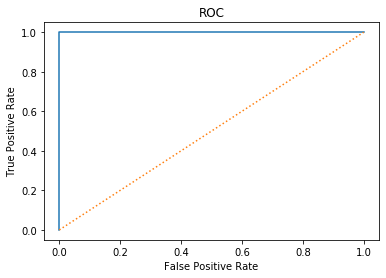

--------AUC Value---------
AUC= 1.0


In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt

train_2=TrainSet(train_set,1)
x_train=train_2.drop(['class'], axis=1)
y_train=train_2['class']
    
train_min=x_train.iloc[:9]
train_maj=x_train.iloc[9:]
train_min_upsample=resample(train_min,replace=True, n_samples=60,random_state=123)
train_upsampled=pd.concat([train_min_upsample,train_maj])
train_upsampled.insert(12, 'class', [1]*60+[0]*60)
x_train_rj=train_upsampled.drop('class',axis=1)
y_train_rj=train_upsampled['class']

model.fit(x_train_rj,y_train_rj)
cm=confusion_matrix(y_train_rj,model.predict(x_train_rj))

print("--------/Confusion matrix/------------")
print(cm)
print("--------/ROC/------------")
FPR, TPR, thresholds = roc_curve(y_train, y_predict)
plt.plot(FPR,TPR)
plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
area = auc(FPR, TPR)
print("--------AUC Value---------")
print("AUC=",area)

<font color=black size=4>
(e) Binary Classiﬁcation Using L1-penalized logistic regression

i. Repeat 1(d)iii using L1-penalized logistic regression. i.e. instead of using pvalues for variable selection, use L1 regularization. 

In [17]:
from sklearn.linear_model import LogisticRegressionCV 
l_list=np.arange(1,21,1)
train_score=[]
test_score=[]
for l in l_list:
    train_1=TrainSet(train_set,l)
    selected_features=[]
    x_train=train_1.drop(['class'], axis=1)
    y_train=train_1['class']
    
    #logistic regression
    m=LogisticRegressionCV(cv=5, penalty="l1", solver="liblinear")
    model=m.fit(x_train, y_train)
    
    train_score.append(model.score(x_train,y_train))
    
    test_1=TrainSet(test_set,l)
    x_test=test_1.drop(['class'], axis=1)
    y_test=test_1['class']
    
    test_score.append(m.score(x_test,y_test))
    
best_l=test_score.index(max(test_score))+1
print("best l:",best_l)
print("train acc",train_score)
print("test acc",test_score)


best l: 1
train acc [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
test acc [1.0, 1.0, 1.0, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 1.0, 1.0, 1.0, 1.0, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 1.0, 0.9473684210526315, 0.9473684210526315]


In [18]:
test_1=TrainSet(test_set,1)
x_test=test_1.drop(['class'], axis=1)
y_test=test_1['class']

model.fit(x_test,y_test)
test_score=model.score(x_test,y_test)
#F1_score=f1_score(y_test,rfe.predict(x_test))
print("test error:",test_score)
print(F1_score)

test error: 1.0
1.0


<font color=black size=4>
ii. Compare the L1-penalized with variable selection using p-values. Which one performs better? Which one is easier to implement? 

Answer:  
From train accuracy and test accuracy, L1-penalized performs better and is alo easier to implement, because I don't need to select features. 

<font color=black size=4>
(f) Multi-class Classiﬁcation (The Realistic Case) 

i. Find the best l in the same way as you found it in 1(e)i to build an L1penalized multinomial regression model to classify all activities in your training set.10 Report your test error. Research how confusion matrices and ROC curves are deﬁned for multiclass classiﬁcation and show them for this problem if possible

In [19]:
def TrainSet_Multi(data_set,l):
    values=math.ceil(480/l)
    feature=1
    features=collections.defaultdict(dict)
    for fold in load_all_data.keys():
        for i in range(len(data_set[fold])):
            time=1
            start=0
            for j in range(l):
                for column in range(1,7):
                    if j!=l-1:
                        cal=data_set[fold][i].iloc[start:start+values,column].describe()
                    else:
                        cal=data_set[fold][i].iloc[start:,column].describe()
                    features[feature]["min"+str(time)]=cal["min"]
                    features[feature]["max"+str(time)]=cal["max"]
                    features[feature]["mean"+str(time)]=cal["mean"]
                    features[feature]["std"+str(time)]=cal["std"]
                    features[feature]["first quartile"+str(time)]=cal["25%"]
                    features[feature]["median"+str(time)]=cal["50%"]
                    features[feature]["third quartile"+str(time)]=cal["75%"]
                    time+=1
                start = start+values
            if fold=="bending1" or fold=="bending2":
                features[feature]["class"]="bending"
            else:
                features[feature]["class"]=fold
            feature+=1
    return pd.DataFrame(features).T

In [20]:
from sklearn.linear_model import LogisticRegression
l_list=np.arange(1,21,1)
train_score=[]
test_score=[]
for l in l_list:
    train_1=TrainSet_Multi(train_set,l)
    x_train=train_1.drop(['class'], axis=1)
    y_train=train_1['class']
    
    #logistic regression
    model_multi=LogisticRegression(penalty="l1", solver="saga")
    model_multi=model_multi.fit(x_train, y_train)
    
    train_score.append(1-(model_multi.score(x_train,y_train)))
    train_error=1-(model_multi.score(x_train,y_train))
    
    test_1=TrainSet_Multi(test_set,l)
    x_test=test_1.drop(['class'], axis=1)
    y_test=test_1['class']
    
    test_score.append(1-(model_multi.score(x_test,y_test)))
    test_err=1-(model_multi.score(x_test,y_test))
    print("l=",l, " train error=",train_error,"test error=",test_err)
    
best_l=test_score.index(min(test_score))+1
print("best l:",best_l)
print("best train acc",min(train_score))
print("best test acc",min(test_score))

l= 1  train error= 0.04347826086956519 test error= 0.10526315789473684
l= 2  train error= 0.02898550724637683 test error= 0.10526315789473684
l= 3  train error= 0.01449275362318836 test error= 0.1578947368421053
l= 4  train error= 0.01449275362318836 test error= 0.1578947368421053
l= 5  train error= 0.02898550724637683 test error= 0.1578947368421053
l= 6  train error= 0.01449275362318836 test error= 0.1578947368421053
l= 7  train error= 0.01449275362318836 test error= 0.21052631578947367
l= 8  train error= 0.01449275362318836 test error= 0.1578947368421053
l= 9  train error= 0.0 test error= 0.1578947368421053
l= 10  train error= 0.01449275362318836 test error= 0.1578947368421053
l= 11  train error= 0.01449275362318836 test error= 0.1578947368421053
l= 12  train error= 0.0 test error= 0.1578947368421053
l= 13  train error= 0.0 test error= 0.1578947368421053
l= 14  train error= 0.01449275362318836 test error= 0.1578947368421053
l= 15  train error= 0.0 test error= 0.1578947368421053
l= 16

In [21]:
train_1=TrainSet_Multi(train_set,1)
#selected_features=[]
x_train=train_1.drop(['class'], axis=1)
y_train=train_1['class']
    
    #logistic regression
model_multi=LogisticRegression(penalty="l1", solver="saga")
model_multi=model_multi.fit(x_train, y_train)


test_1=TrainSet_Multi(test_set,1)
x_test=test_1.drop(['class'], axis=1)
y_test=test_1['class']
y_predict_train=model_multi.predict(x_train)
y_predict_test=model_multi.predict(x_test)
cm_train=pd.crosstab(y_train,y_predict_train,rownames=['True'],colnames=['Predict'],margins=True)
print("-----------\"Confusion Matrix for train\"-------------")
print(cm_train)
cm_test= pd.crosstab(y_test, y_predict_test, rownames=['True'],colnames=['Predict'], margins=True)
print("-----------\"Confusion Matrix for test\"-------------")
print(cm_test)


-----------"Confusion Matrix for train"-------------
Predict   bending  cycling  lying  sitting  standing  walking  All
True                                                              
bending         9        0      0        0         0        0    9
cycling         0       12      0        0         0        0   12
lying           0        0     12        0         0        0   12
sitting         0        0      1       11         0        0   12
standing        0        0      0        2        10        0   12
walking         0        0      0        0         0       12   12
All             9       12     13       13        10       12   69
-----------"Confusion Matrix for test"-------------
Predict   bending  cycling  lying  sitting  standing  walking  All
True                                                              
bending         3        1      0        0         0        0    4
cycling         0        3      0        0         0        0    3
lying           0       

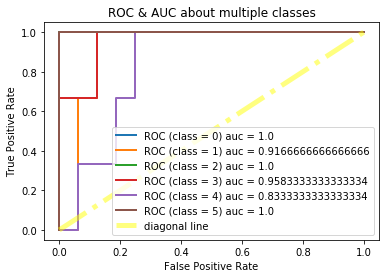

In [22]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
bin_y_train = label_binarize(y_train, classes=["bending","cycling", "lying", "sitting", "standing","walking"])
bin_y_test = label_binarize(y_test, classes=["bending","cycling", "lying", "sitting", "standing","walking"])

classifier = OneVsRestClassifier(LogisticRegression(penalty="l1", solver="saga")).fit(x_train, bin_y_train)

y_score = classifier.fit(x_train, bin_y_train).decision_function(x_test)

fpr = dict()
tpr = dict()
areas = dict()
for i in range(bin_y_train.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(bin_y_test[:, i], y_score[:, i])
    areas[i] = auc(fpr[i], tpr[i])

for index in range(bin_y_train.shape[1]):
    plt.plot(fpr[index], tpr[index], label='ROC (class = {}) auc = {}'.format(index, str(areas[index])), linewidth=2, linestyle='-')

plt.plot([0, 1], [0, 1], linestyle='-.', linewidth=5, alpha=0.5, color='yellow', label='diagonal line')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC & AUC about multiple classes')
plt.legend()
plt.show()

ii. Repeat 1(f)i using a Na¨ıve Bayes’ classiﬁer. Use both Gaussian and Multinomial priors and compare the results. 

Gaussian:

In [23]:
from sklearn.naive_bayes import GaussianNB
l_list=np.arange(1,21,1)
train_score=[]
test_score=[]
for l in l_list:
    train_1=TrainSet_Multi(train_set,l)
    x_train=train_1.drop(['class'], axis=1)
    y_train=train_1['class']
    
    model_multi_gaussian=GaussianNB()
    model_multi_gaussian=model_multi_gaussian.fit(x_train, y_train)
    
    train_score.append(1-(model_multi_gaussian.score(x_train,y_train)))
    train_error=1-(model_multi_gaussian.score(x_train,y_train))
    
    test_1=TrainSet_Multi(test_set,l)
    x_test=test_1.drop(['class'], axis=1)
    y_test=test_1['class']
    
    test_score.append(1-(model_multi_gaussian.score(x_test,y_test)))
    test_err=1-(model_multi_gaussian.score(x_test,y_test))
    
    print("l=",l, "test error=",test_err)
    
best_l=test_score.index(min(test_score))+1
print("best l:",best_l)
print("best train acc",min(train_score))
print("best test acc",min(test_score))

l= 1 test error= 0.10526315789473684
l= 2 test error= 0.1578947368421053
l= 3 test error= 0.21052631578947367
l= 4 test error= 0.10526315789473684
l= 5 test error= 0.10526315789473684
l= 6 test error= 0.21052631578947367
l= 7 test error= 0.21052631578947367
l= 8 test error= 0.21052631578947367
l= 9 test error= 0.1578947368421053
l= 10 test error= 0.1578947368421053
l= 11 test error= 0.368421052631579
l= 12 test error= 0.26315789473684215
l= 13 test error= 0.3157894736842105
l= 14 test error= 0.368421052631579
l= 15 test error= 0.42105263157894735
l= 16 test error= 0.4736842105263158
l= 17 test error= 0.4736842105263158
l= 18 test error= 0.368421052631579
l= 19 test error= 0.368421052631579
l= 20 test error= 0.42105263157894735
best l: 1
best train acc 0.0
best test acc 0.10526315789473684


In [24]:
train_1=TrainSet_Multi(train_set,1)
#selected_features=[]
x_train=train_1.drop(['class'], axis=1)
y_train=train_1['class']
    
    #logistic regression
model_multi_gaussian=GaussianNB()
model_multi_gaussian=model_multi_gaussian.fit(x_train, y_train)

test_1=TrainSet_Multi(test_set,1)
x_test=test_1.drop(['class'], axis=1)
y_test=test_1['class']
y_predict_train=model_multi_gaussian.predict(x_train)
y_predict_test=model_multi_gaussian.predict(x_test)
cm_train=pd.crosstab(y_train,y_predict_train,rownames=['True'],colnames=['Predict'],margins=True)
print("-----------\"Confusion Matrix for train\"-------------")
print(cm_train)
cm_test= pd.crosstab(y_test, y_predict_test, rownames=['True'],colnames=['Predict'], margins=True)
print("-----------\"Confusion Matrix for test\"-------------")
print(cm_test)

-----------"Confusion Matrix for train"-------------
Predict   bending  cycling  lying  sitting  standing  walking  All
True                                                              
bending         8        0      1        0         0        0    9
cycling         0       12      0        0         0        0   12
lying           0        0     12        0         0        0   12
sitting         0        0      0       12         0        0   12
standing        0        0      0        0        12        0   12
walking         0        0      0        0         0       12   12
All             8       12     13       12        12       12   69
-----------"Confusion Matrix for test"-------------
Predict   bending  cycling  lying  sitting  standing  walking  All
True                                                              
bending         4        0      0        0         0        0    4
cycling         0        3      0        0         0        0    3
lying           1       

Multinomial:

In [25]:
from sklearn.naive_bayes import MultinomialNB
l_list=np.arange(1,21,1)
train_score=[]
test_score=[]
for l in l_list:
    train_1=TrainSet_Multi(train_set,l)
    x_train=train_1.drop(['class'], axis=1)
    y_train=train_1['class']

    model_multi_mn=MultinomialNB()
    model_multi_mn=model_multi_mn.fit(x_train, y_train)

    train_score.append(1-(model_multi_mn.score(x_train,y_train)))
    train_error=1-(model_multi_mn.score(x_train,y_train))
   
    test_1=TrainSet_Multi(test_set,l)
    x_test=test_1.drop(['class'], axis=1)
    y_test=test_1['class']
    
    test_score.append(1-(model_multi_mn.score(x_test,y_test)))
    test_err=1-(model_multi_mn.score(x_test,y_test))
    
    print("l=",l, " train error=",train_error,"test error=",test_err)
    
best_l=test_score.index(min(test_score))+1
print("best l:",best_l)
#print("best train acc",min(train_score))
print("best test acc",min(test_score))

l= 1  train error= 0.07246376811594202 test error= 0.10526315789473684
l= 2  train error= 0.1159420289855072 test error= 0.1578947368421053
l= 3  train error= 0.10144927536231885 test error= 0.1578947368421053
l= 4  train error= 0.10144927536231885 test error= 0.1578947368421053
l= 5  train error= 0.07246376811594202 test error= 0.1578947368421053
l= 6  train error= 0.04347826086956519 test error= 0.1578947368421053
l= 7  train error= 0.05797101449275366 test error= 0.1578947368421053
l= 8  train error= 0.05797101449275366 test error= 0.1578947368421053
l= 9  train error= 0.04347826086956519 test error= 0.1578947368421053
l= 10  train error= 0.04347826086956519 test error= 0.1578947368421053
l= 11  train error= 0.04347826086956519 test error= 0.052631578947368474
l= 12  train error= 0.04347826086956519 test error= 0.1578947368421053
l= 13  train error= 0.04347826086956519 test error= 0.10526315789473684
l= 14  train error= 0.04347826086956519 test error= 0.1578947368421053
l= 15  train

In [26]:
train_1=TrainSet_Multi(train_set,11)
#selected_features=[]
x_train=train_1.drop(['class'], axis=1)
y_train=train_1['class']
    
    #logistic regression
model_multi_mn=MultinomialNB()
model_multi_mn=model_multi_mn.fit(x_train, y_train)

test_1=TrainSet_Multi(test_set,11)
x_test=test_1.drop(['class'], axis=1)
y_test=test_1['class']
y_predict_train=model_multi_mn.predict(x_train)
y_predict_test=model_multi_mn.predict(x_test)
cm_train=pd.crosstab(y_train,y_predict_train,rownames=['True'],colnames=['Predict'],margins=True)
print("-----------\"Confusion Matrix for train\"-------------")
print(cm_train)
cm_test= pd.crosstab(y_test, y_predict_test, rownames=['True'],colnames=['Predict'], margins=True)
print("-----------\"Confusion Matrix for test\"-------------")
print(cm_test)

-----------"Confusion Matrix for train"-------------
Predict   bending  cycling  lying  sitting  standing  walking  All
True                                                              
bending         9        0      0        0         0        0    9
cycling         0       12      0        0         0        0   12
lying           0        0     12        0         0        0   12
sitting         1        0      1       10         0        0   12
standing        0        0      0        1        11        0   12
walking         0        0      0        0         0       12   12
All            10       12     13       11        11       12   69
-----------"Confusion Matrix for test"-------------
Predict   bending  cycling  lying  sitting  standing  walking  All
True                                                              
bending         4        0      0        0         0        0    4
cycling         0        3      0        0         0        0    3
lying           0       

The test error of multinomial is 0.052631578947368474, the test errir of Gaussian is 0.10526315789473684. So multinomial performs better.

iii. Which method is better for multi-class classiﬁcation in this problem?

test error of these three methods: linear Regression: 0.10526315789473684;multinomial Naive Bayes: 0.052631578947368474;  
Gaussian Naive Bayes:0.10526315789473684  
So in this problem multinomial Naive Bayes performs better for multi-class classification.

